1. Research Objective
This study aims to apply Linear Regression to predict California housing prices based on socio-economic and geographical features such as population density, average income, and the number of rooms per household.

The model will be evaluated using metrics like R-squared and Mean Squared Error (MSE). This regression task demonstrates the effectiveness of linear models on real-world, continuous-valued target variables.

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing(as_frame=True)
df = data.frame

df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [2]:
df.to_csv("california_housing.csv", index=False)


2. Dataset Description
Source: Scikit-learn’s built-in fetch_california_housing dataset.

Target Variable: MedHouseVal (median house value in $100,000s).

Features:

MedInc: median income in the block

HouseAge: median house age

AveRooms: average number of rooms per household

AveBedrms: average number of bedrooms per household

Population: block population

AveOccup: average occupancy per household

Latitude, Longitude: geographical location



3. Linear Regression Implementation (Python Code)

Mean Squared Error: 0.5558915986952441
R-squared Score: 0.575787706032451


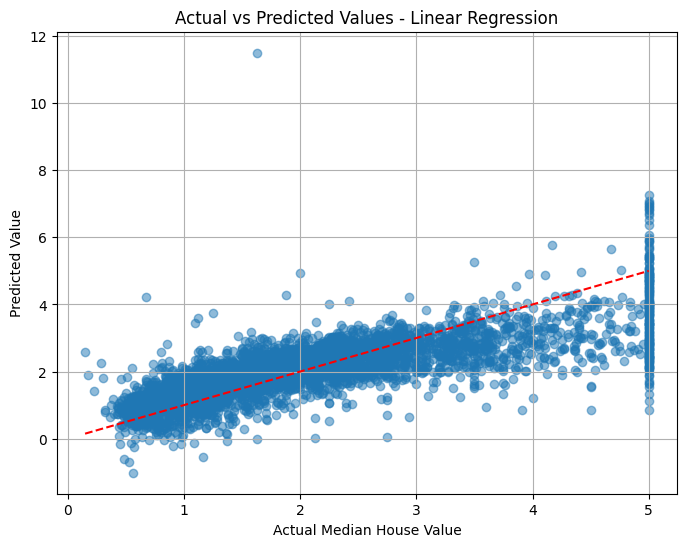

In [3]:
# Load libraries
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Feature matrix and target vector
X = df.drop(columns='MedHouseVal')
y = df['MedHouseVal']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model fitting
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Visualization: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted Values - Linear Regression")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid(True)
plt.show()


4. Results and Interpretation
The performance of the Linear Regression model is evaluated using two key metrics:

Mean Squared Error (MSE): 0.556
This indicates the average squared difference between the predicted and actual median house values. A lower MSE indicates better performance, though some error is expected due to noise and model simplicity.

R-squared Score (R²): 0.576
The model explains approximately 57.6% of the variance in housing prices. While not exceptionally high, this indicates a moderate linear relationship between the selected features and the target variable.

Plot Analysis:
The scatter plot of actual vs predicted values shows a positively correlated trend, with many predictions falling close to the diagonal.

However, there is: Underestimation in higher-value homes (actual near 5.0, predictions mostly below 5),Some noise across all ranges, particularly for mid-range prices.

The regression line (dashed red) shows a general upward trend, consistent with housing value growth relative to features like income and location.

This pattern suggests that while the model captures broad trends, it lacks precision in higher or more extreme values, likely due to its linear nature and potential feature limitations.



5. Conclusion
This analysis demonstrates that Linear Regression can model the California Housing Dataset with reasonable success. The model captures general pricing trends based on demographic and geographical features, but it shows limitations in capturing complex or non-linear interactions.